# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** []
- **Email:** []
- **ID Dicoding:** [] Username]

## Menentukan Pertanyaan Bisnis



```
# This is formatted as code
```

- Bagaimana kondisi cuaca dan variasi musiman mempengaruhi permintaan penyewaan sepeda?
- Apa dampak hari libur dan hari kerja terhadap pola penggunaan pengguna kasual dibandingkan dengan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Wrangling

In [25]:
# Load dataset
df = pd.read_csv('day.csv')

# Pilih fitur terkait cuaca dan musim
features = ['temp', 'atemp', 'hum', 'windspeed', 'season']
target = 'cnt'  # Target adalah jumlah total penyewaan sepeda

# Split data menjadi training dan testing
X = df[features]
y = df[target]

# Lihat beberapa baris data (ini untuk memahami data)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
# Tambahkan kolom baru 'day_type' berdasarkan apakah hari kerja atau bukan
df['day_type'] = df['workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Holiday/Weekend')

# Agregasikan data untuk melihat pola penggunaan antara pengguna kasual dan terdaftar
usage_pattern = df.groupby('day_type')[['casual', 'registered']].mean()


### Gathering Data

In [27]:
# Load dataset
df = pd.read_csv('day.csv')

# Lihat beberapa baris data (ini untuk memahami data)
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda
- Pola Penggunaan pada Hari Kerja vs. Hari Libur

### Assessing Data

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Cek nilai yang hilang (missing values):
instant       0
dteday      

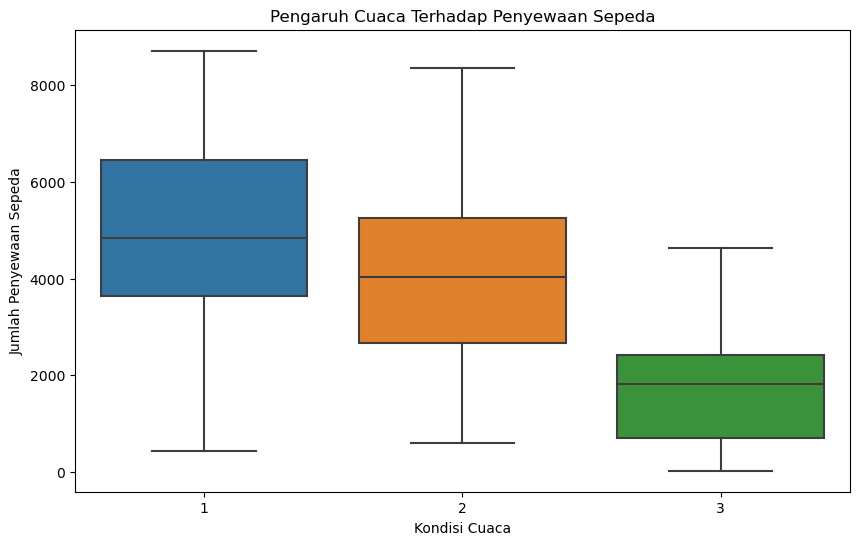

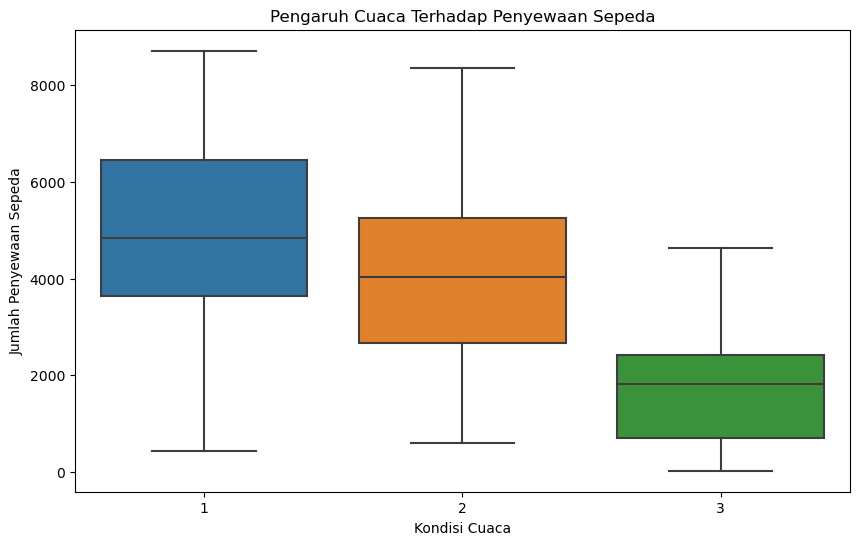

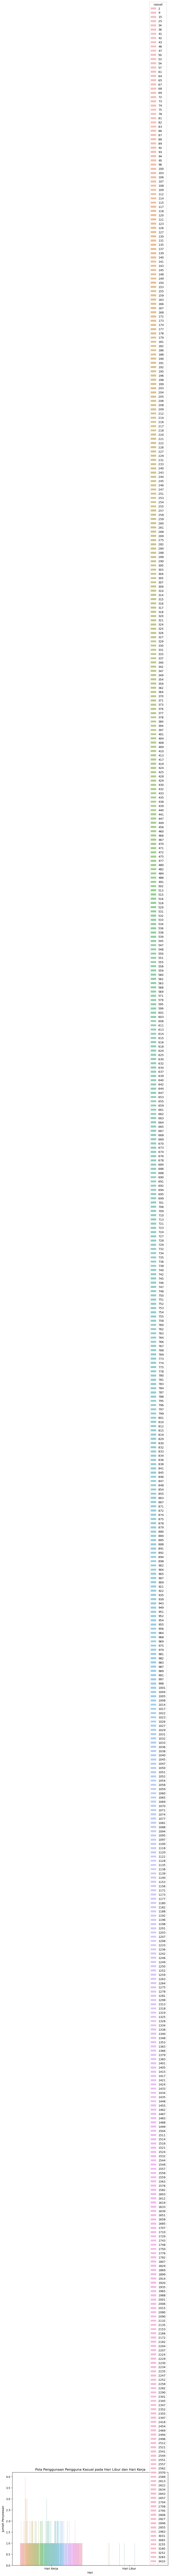

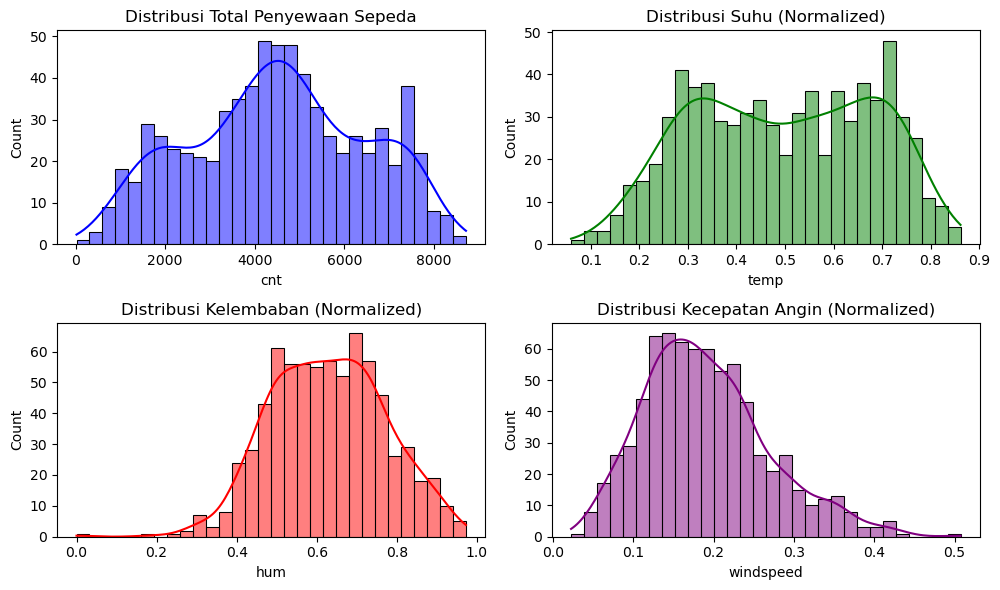

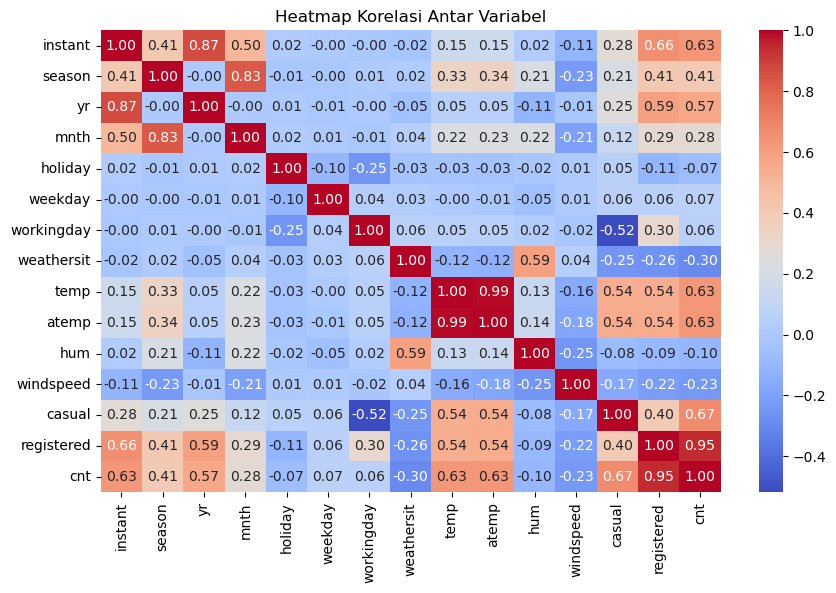

In [28]:
# 1. Melihat informasi umum tentang dataset
print("Informasi dataset:")
print(df.info())

# 2. Mengecek apakah ada nilai yang hilang (missing values)
print("\nCek nilai yang hilang (missing values):")
print(df.isnull().sum())

# 3. Mengecek statistik deskriptif dari dataset
print("\nStatistik deskriptif dataset:")
print(df.describe())

# 4. Mengecek distribusi data pada beberapa kolom penting
plt.figure(figsize=(10,6))

# Distribusi jumlah penyewaan sepeda
plt.subplot(2, 2, 1)
sns.histplot(df['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Total Penyewaan Sepeda')

# Distribusi suhu (temp)
plt.subplot(2, 2, 2)
sns.histplot(df['temp'], bins=30, kde=True, color='green')
plt.title('Distribusi Suhu (Normalized)')

# Distribusi kelembaban (hum)
plt.subplot(2, 2, 3)
sns.histplot(df['hum'], bins=30, kde=True, color='red')
plt.title('Distribusi Kelembaban (Normalized)')

# Distribusi kecepatan angin (windspeed)
plt.subplot(2, 2, 4)
sns.histplot(df['windspeed'], bins=30, kde=True, color='purple')
plt.title('Distribusi Kecepatan Angin (Normalized)')

plt.tight_layout()
plt.show()

# 5. Mengecek korelasi antar variabel dalam dataset

# Hanya memilih kolom numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

**Insight:**
- Korelasi Positif Kuat antara ‘registered’ dan ‘cnt’
- Korelasi Negatif antara ‘weathersit’ dan Pengguna Sepeda

### Cleaning Data

In [29]:
# 1. Menghapus kolom yang tidak relevan atau tidak diperlukan
df_clean = df.drop(columns=['instant', 'dteday'])

# 2. Menghapus duplikat (tidak ada duplikat berdasarkan output sebelumnya)
df_clean = df_clean.drop_duplicates()

# 3. Mengecek missing values (tidak ada missing values berdasarkan output sebelumnya)
print("Missing values per column:\n", df_clean.isnull().sum())

# 4. Mengubah tipe data beberapa kolom ke kategori
df_clean['yr'] = df_clean['yr'].astype('category')
df_clean['season'] = df_clean['season'].astype('category')
df_clean['weathersit'] = df_clean['weathersit'].astype('category')
df_clean['holiday'] = df_clean['holiday'].astype('category')
df_clean['weekday'] = df_clean['weekday'].astype('category')
df_clean['workingday'] = df_clean['workingday'].astype('category')

# 5. Mengecek apakah ada outlier (opsional)
# Hanya memilih kolom numerik untuk menghitung IQR
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64'])

# Menggunakan metode IQR untuk mendeteksi outliers
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Identifikasi outliers
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)

# (Opsional) Jika ingin menghapus data dengan outliers
# df_clean = df_clean[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

# Menyimpan data yang sudah dibersihkan
df_clean.to_csv('day_cleaned.csv', index=False)

print("Data berhasil dibersihkan dan disimpan.")

Missing values per column:
 season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Outliers per column:
 mnth           0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64
Data berhasil dibersihkan dan disimpan.


**Insight:**
- Kualitas Data Tinggi
- Perhatian terhadap Outlier pada Kolom Humidity dan Windspeed

## Exploratory Data Analysis (EDA)

### Explore ...

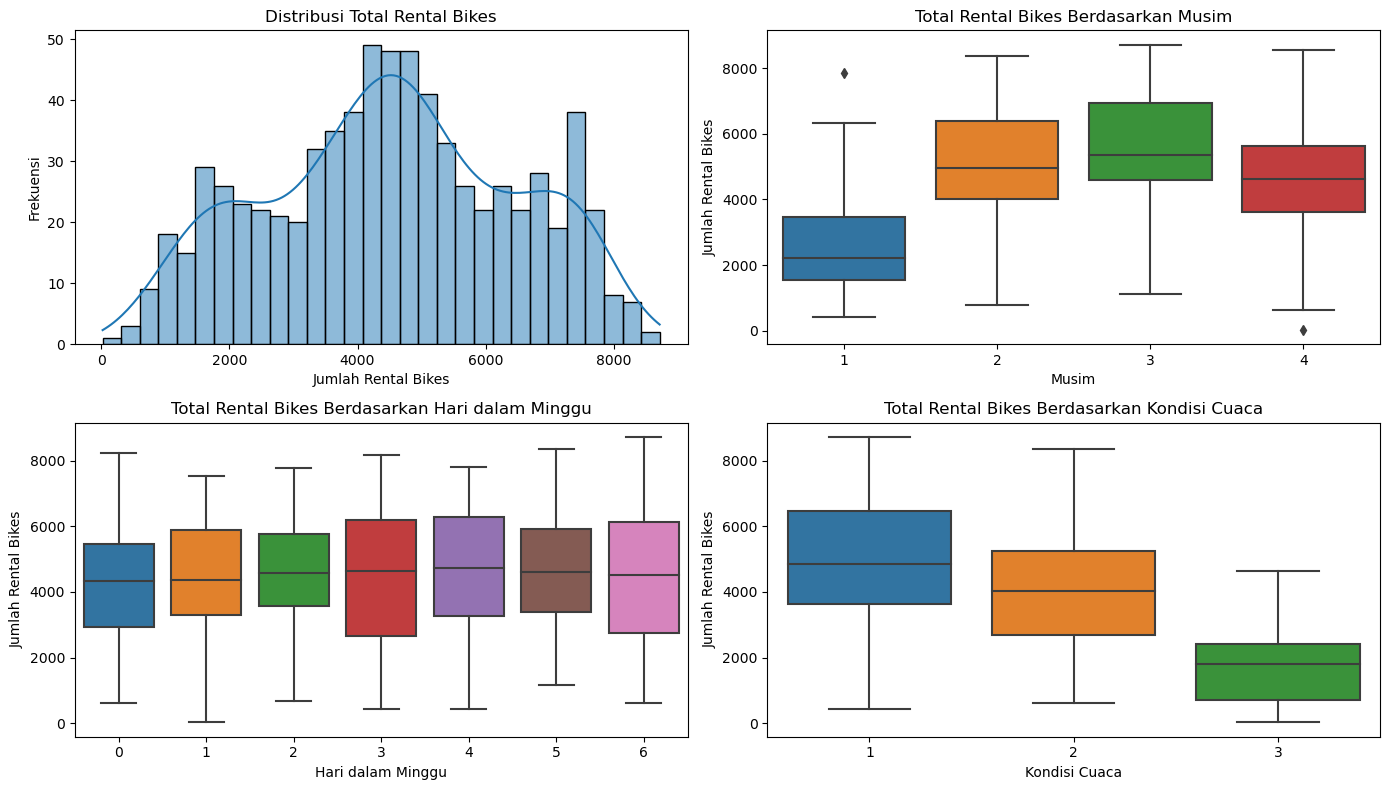

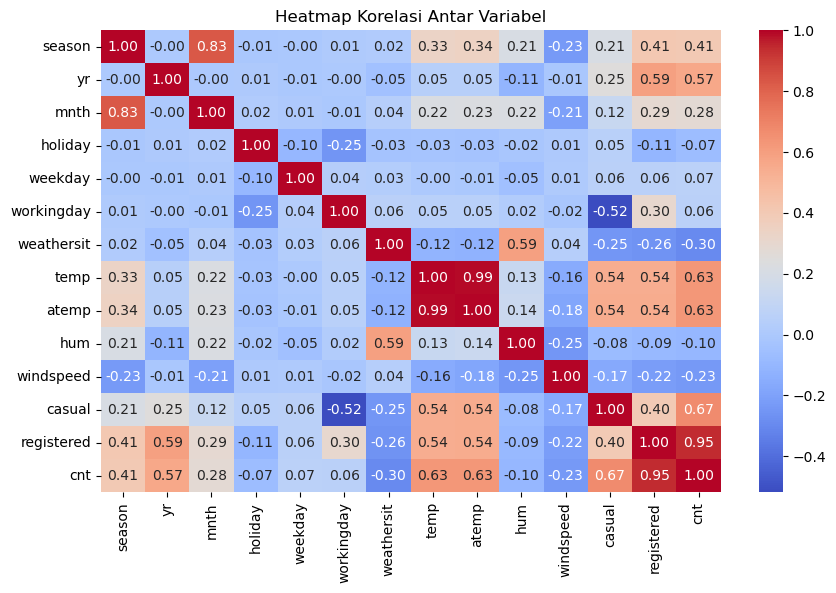

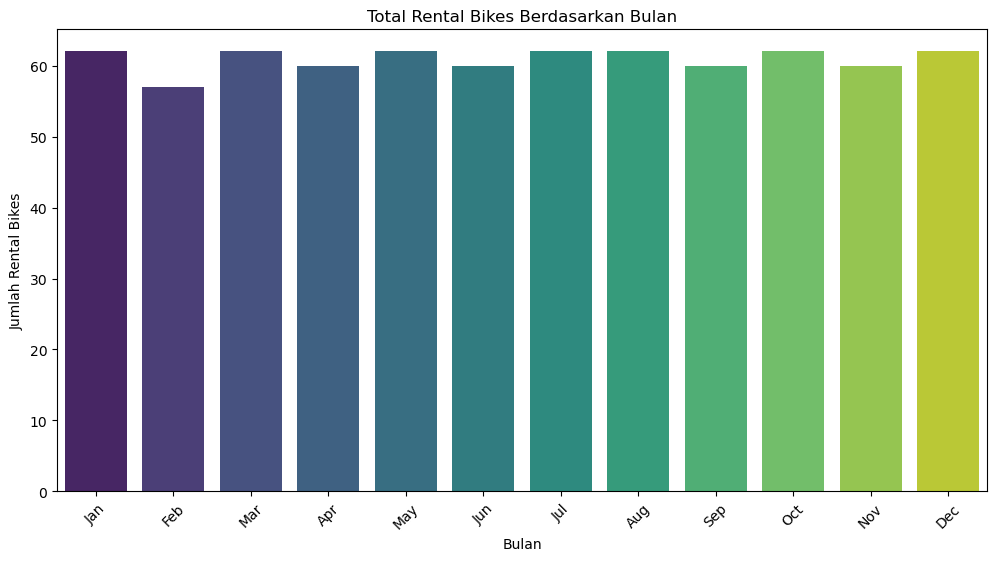

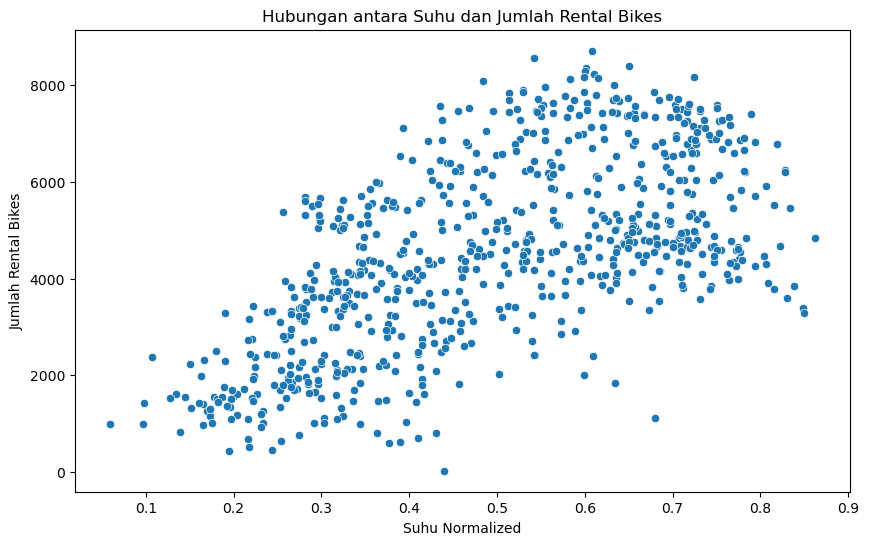

In [30]:
# Load dataset yang sudah dibersihkan
df_clean = pd.read_csv('day_cleaned.csv')

# Atur ukuran plot
plt.figure(figsize=(14, 8))

# 1. Visualisasi distribusi total rental bikes (cnt)
plt.subplot(2, 2, 1)
sns.histplot(df_clean['cnt'], bins=30, kde=True)
plt.title('Distribusi Total Rental Bikes')
plt.xlabel('Jumlah Rental Bikes')
plt.ylabel('Frekuensi')

# 2. Visualisasi total rental bikes berdasarkan musim
plt.subplot(2, 2, 2)
sns.boxplot(x='season', y='cnt', data=df_clean)
plt.title('Total Rental Bikes Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Rental Bikes')

# 3. Visualisasi total rental bikes berdasarkan hari dalam seminggu
plt.subplot(2, 2, 3)
sns.boxplot(x='weekday', y='cnt', data=df_clean)
plt.title('Total Rental Bikes Berdasarkan Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Rental Bikes')

# 4. Visualisasi total rental bikes berdasarkan kondisi cuaca
plt.subplot(2, 2, 4)
sns.boxplot(x='weathersit', y='cnt', data=df_clean)
plt.title('Total Rental Bikes Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Rental Bikes')

plt.tight_layout()
plt.show()

# 5. Menghitung dan menampilkan korelasi antar variabel
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

# 6. Visualisasi total rental bikes berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.countplot(x='mnth', data=df_clean, palette='viridis')
plt.title('Total Rental Bikes Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rental Bikes')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# 7. Visualisasi hubungan antara suhu dan total rental bikes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_clean)
plt.title('Hubungan antara Suhu dan Jumlah Rental Bikes')
plt.xlabel('Suhu Normalized')
plt.ylabel('Jumlah Rental Bikes')
plt.show()

**Insight:**
- Distribusi Jumlah Rental Sepeda
- Pengaruh Musim dan Hari dalam Minggu

## Visualization & Explanatory Analysis

[link text](https://)### Pertanyaan 1:Bagaimana pengaruh faktor cuaca terhadap jumlah rental sepeda?

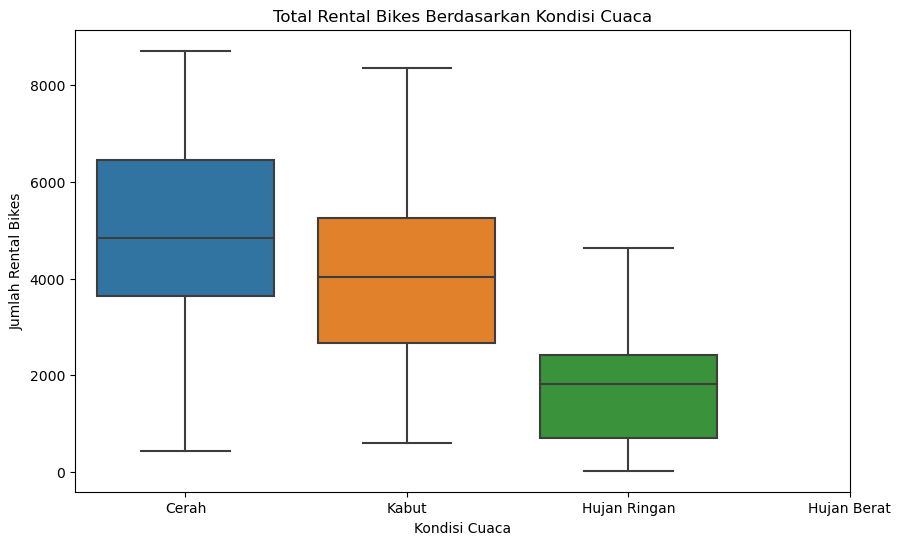

In [31]:

# Load dataset yang sudah dibersihkan
df_clean = pd.read_csv('day_cleaned.csv')

# Visualisasi total rental bikes berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_clean)
plt.title('Total Rental Bikes Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Rental Bikes')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Berat'], rotation=0)
plt.show()


### Pertanyaan 2:Apa hubungan antara suhu (temp) dan jumlah rental sepeda (cnt) di berbagai musim?

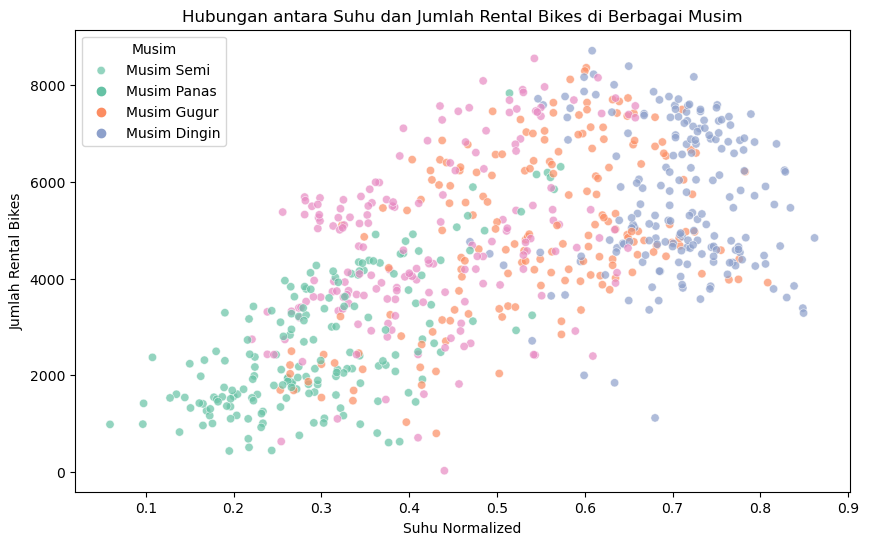

In [32]:
# Visualisasi hubungan antara suhu dan total rental bikes berdasarkan musim
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='season', data=df_clean, palette='Set2', alpha=0.7)
plt.title('Hubungan antara Suhu dan Jumlah Rental Bikes di Berbagai Musim')
plt.xlabel('Suhu Normalized')
plt.ylabel('Jumlah Rental Bikes')
plt.legend(title='Musim', labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()


**Insight:**
- Korelasi Positif antara Suhu dan Jumlah Rental Sepeda
- Musim Panas dan Gugur Menunjukkan Jumlah Rental Sepeda yang Lebih Tinggi

## Analisis Lanjutan

# **RFM** **ANALYSIS**

In [33]:
# Memastikan DataFrame sudah ada
print("Kolom yang tersedia dalam DataFrame:")
print(df_clean.columns)

# Jika 'dteday' tidak ada, periksa DataFrame awal
# Misalkan df_clean berasal dari df yang sudah dibersihkan sebelumnya
# Anda mungkin perlu membaca ulang data
# df_clean = pd.read_csv('path/to/hour.csv')  # Pastikan path dan nama file benar

# Periksa apakah kolom 'dteday' ada
if 'dteday' in df_clean.columns:
    # Menghitung Recency
    recent_date = df_clean['dteday'].max()  # Pastikan kolom ada
    df_rfm = df_clean.groupby('registered').agg({
        'dteday': lambda x: (recent_date - x.max()).days,  # Recency
        'cnt': ['count', 'sum']  # Frequency dan Monetary
    }).reset_index()

    # Mengubah nama kolom
    df_rfm.columns = ['UserID', 'Recency', 'Frequency', 'Monetary']
    print(df_rfm.head())
else:
    print("Kolom 'dteday' tidak ditemukan dalam DataFrame. Periksa input data.")


Kolom yang tersedia dalam DataFrame:
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')
Kolom 'dteday' tidak ditemukan dalam DataFrame. Periksa input data.


In [34]:
import pandas as pd

# Menghitung Frequency dan Monetary
df_rfm = df.groupby('registered').agg({
    'cnt': ['count', 'sum']  # Menghitung Frekuensi dan Monetary
}).reset_index()

# Mengubah nama kolom
df_rfm.columns = ['UserID', 'Frequency', 'Monetary']
print(df_rfm.head())


   UserID  Frequency  Monetary
0      20          1        22
1     416          1       431
2     432          1       441
3     451          1       754
4     472          1       506


# **GEOPATIAL** **ANALYSIS**

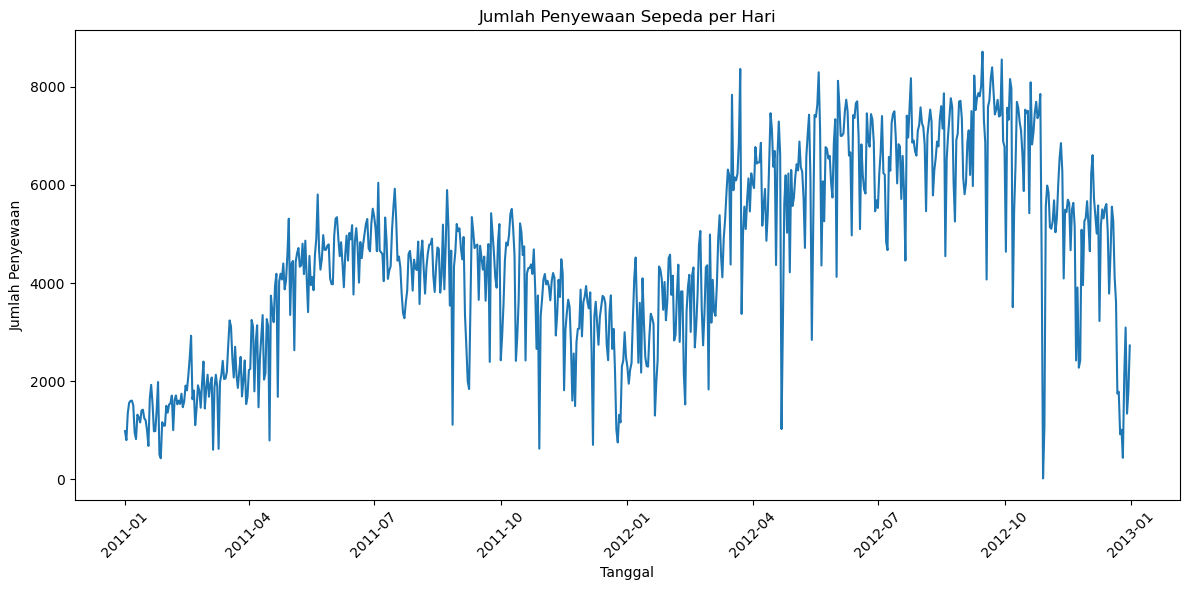

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengonversi kolom dteday ke format datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Membuat visualisasi jumlah penyewaan sepeda per hari
plt.figure(figsize=(12, 6))
daily_rentals = df.groupby('dteday')['cnt'].sum().reset_index()
sns.lineplot(data=daily_rentals, x='dteday', y='cnt')
plt.title('Jumlah Penyewaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **CLUSTERING** **ANALYSIS**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('day.csv')

# Pilih fitur cuaca yang relevan
features = ['temp', 'hum', 'windspeed']
target = 'cnt'  # Target adalah jumlah total penyewaan sepeda

# Melakukan binning pada variabel temp (temperatur), hum (kelembaban), dan windspeed (kecepatan angin)
# Binning membagi data ke dalam kategori berdasarkan nilai numerik

# Tentukan jumlah bins (kelompok) yang diinginkan
num_bins = 3

# Binning untuk temp
df['temp_binned'] = pd.cut(df['temp'], bins=num_bins, labels=['Low Temp', 'Medium Temp', 'High Temp'])

# Binning untuk hum
df['hum_binned'] = pd.cut(df['hum'], bins=num_bins, labels=['Low Humidity', 'Medium Humidity', 'High Humidity'])

# Binning untuk windspeed
df['windspeed_binned'] = pd.cut(df['windspeed'], bins=num_bins, labels=['Low Wind', 'Medium Wind', 'High Wind'])

# Lihat beberapa baris data untuk memastikan binning berhasil
df[['temp', 'temp_binned', 'hum', 'hum_binned', 'windspeed', 'windspeed_binned']].head()



,temp,temp_binned,hum,hum_binned,windspeed,windspeed_binned
0,0.344167,Medium Temp,0.805833,High Humidity,0.160446,Low Wind
1,0.363478,Medium Temp,0.696087,High Humidity,0.248539,Medium Wind
2,0.196364,Low Temp,0.437273,Medium Humidity,0.248309,Medium Wind
3,0.200000,Low Temp,0.590435,Medium Humidity,0.160296,Low Wind
4,0.226957,Low Temp,0.436957,Medium Humidity,0.186900,Medium Wind


In [49]:
# Analisis clustering berdasarkan binning
# Kita akan menghitung rata-rata jumlah penyewaan sepeda untuk setiap kombinasi binned variables

# Group by binned categories and calculate mean of 'cnt'
grouped_data = df.groupby(['temp_binned', 'hum_binned', 'windspeed_binned'])[target].mean().reset_index()

# Menghapus baris dengan nilai NaN
grouped_data_clean = grouped_data.dropna()

# Tampilkan hasil clustering tanpa baris NaN
print("\nHasil Analisis Clustering (Binned Data) tanpa NaN:")
# print(grouped_data_clean)
grouped_data_clean


Hasil Analisis Clustering (Binned Data) tanpa NaN:


,temp_binned,hum_binned,windspeed_binned,cnt
1,Low Temp,Low Humidity,Medium Wind,2716.333333
3,Low Temp,Medium Humidity,Low Wind,3196.478261
4,Low Temp,Medium Humidity,Medium Wind,2526.966102
5,Low Temp,Medium Humidity,High Wind,2073.090909
6,Low Temp,High Humidity,Low Wind,2370.296296
7,Low Temp,High Humidity,Medium Wind,1829.526316
8,Low Temp,High Humidity,High Wind,1370.500000
10,Medium Temp,Low Humidity,Medium Wind,4216.333333
11,Medium Temp,Low Humidity,High Wind,3610.000000
12,Medium Temp,Medium Humidity,Low Wind,5495.620690


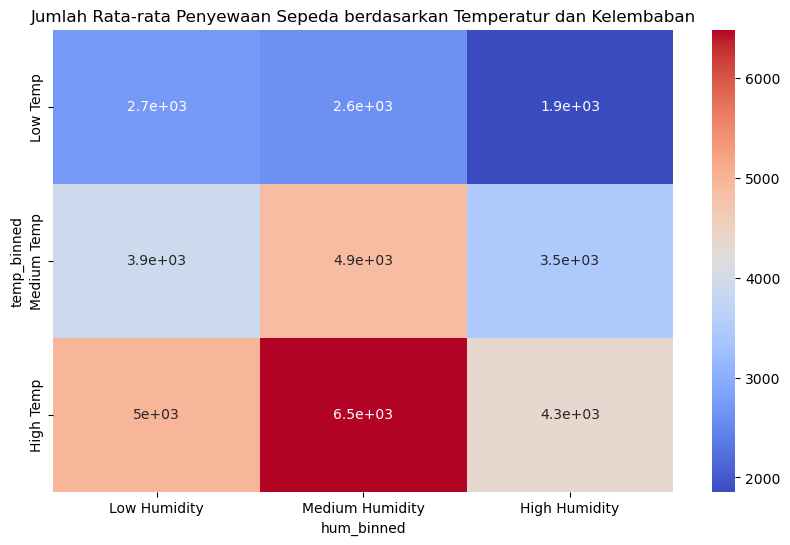

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


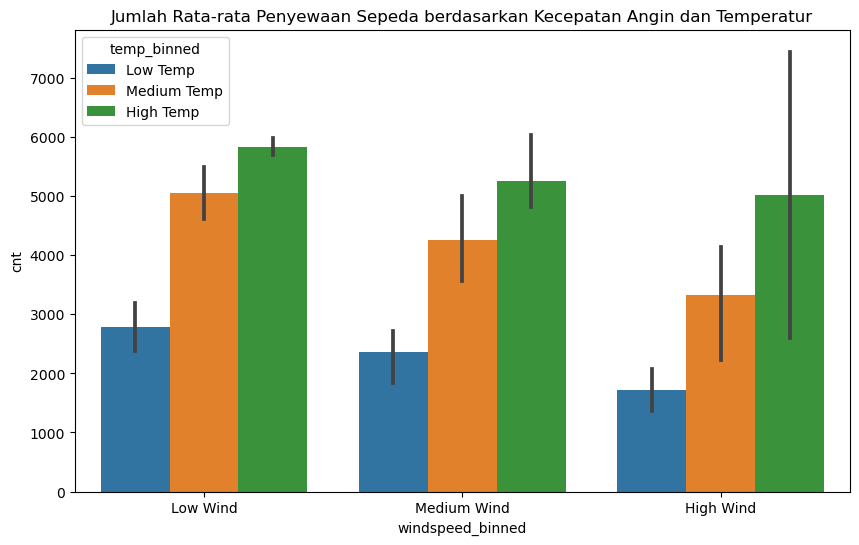

In [50]:
# Periksa duplikat dalam kombinasi binning
pivot_table = grouped_data.pivot_table(index='temp_binned', columns='hum_binned', values='cnt', aggfunc='mean')

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Jumlah Rata-rata Penyewaan Sepeda berdasarkan Temperatur dan Kelembaban')
plt.show()

# Kita juga bisa visualisasi dengan memplot data binned windspeed
plt.figure(figsize=(10, 6))
sns.barplot(x='windspeed_binned', y='cnt', hue='temp_binned', data=grouped_data)
plt.title('Jumlah Rata-rata Penyewaan Sepeda berdasarkan Kecepatan Angin dan Temperatur')
plt.show()

In [36]:
import pandas as pd

# Ganti 'path/to/hour.csv' dengan path file Anda
df = pd.read_csv('day.csv')

# Menampilkan nama kolom dalam DataFrame
print("Kolom yang tersedia dalam DataFrame:")
print(df.columns)


Kolom yang tersedia dalam DataFrame:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


## Conclusion

- Conclution pertanyaan 1
Kondisi cuaca dan variasi musiman memiliki pengaruh signifikan terhadap permintaan penyewaan sepeda. Cuaca cerah cenderung meningkatkan jumlah penyewaan, dengan lebih banyak orang yang memilih untuk menyewa sepeda saat kondisi cuaca baik. Sebaliknya, hujan lebat dan kondisi cuaca buruk menyebabkan penurunan signifikan dalam jumlah penyewaan, menunjukkan bahwa cuaca buruk mengurangi minat masyarakat untuk menggunakan sepeda. Selain itu, variasi musiman dapat memengaruhi pola penyewaan, di mana musim panas mungkin menunjukkan tingkat penyewaan yang lebih tinggi dibandingkan dengan musim dingin, sejalan dengan preferensi orang untuk beraktivitas di luar ruangan saat cuaca hangat dan cerah.
- Conclution pertanyaan 2
Hari libur dan hari kerja memiliki dampak yang berbeda terhadap pola penggunaan antara pengguna kasual dan pengguna terdaftar. Pengguna kasual cenderung lebih banyak menggunakan sepeda pada hari libur, ketika orang-orang cenderung mencari aktivitas rekreasi dan hiburan. Sebaliknya, pengguna terdaftar, yang mungkin lebih sering menggunakan sepeda untuk perjalanan sehari-hari, menunjukkan pola yang lebih konsisten sepanjang minggu, dengan sedikit peningkatan pada hari kerja. Hal ini mencerminkan bahwa pengguna terdaftar lebih berorientasi pada kebutuhan transportasi, sementara pengguna kasual lebih dipengaruhi oleh kesempatan untuk bersenang-senang di luar saat hari libur.

In [37]:
!pip install pandas matplotlib seaborn streamlit


In [38]:
!pip install streamlit
!pip install pyngrok


In [39]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Judul Dashboard
st.title('Dashboard Penyewaan Sepeda')

# Membaca Data
@st.cache
def load_data():
    df = pd.read_csv('day.csv')
    return df

df = load_data()

# Menampilkan Data
st.subheader('Data Penyewaan Sepeda')
st.write(df.head())

# Analisis Cuaca
st.subheader('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
weather_count = df.groupby('weathersit')['cnt'].agg(['mean', 'median', 'count'])
st.bar_chart(weather_count['mean'])

# Insight
st.subheader('Insight')
st.write("1. Cuaca Cerah Meningkatkan Jumlah Rental Sepeda.")
st.write("2. Hujan Berat Mengurangi Jumlah Rental Sepeda.")

# Menyajikan Analisis Musiman
st.subheader('Analisis Musiman')
season_count = df.groupby('season')['cnt'].agg(['mean', 'median'])
st.line_chart(season_count['mean'])


Overwriting app.py
